<a href="https://www.kaggle.com/code/ahmedalmadami/depression-classification?scriptVersionId=111684857" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv


# Classfying whether a tweet is positive or negative

**Import Libraries**

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Create a DataFrame for the dataset**

In [3]:
df = pd.read_csv('../input/mental-health-social-media/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


**Data Processing**

In [4]:
# check for missing values
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [5]:
# create new dataframe with only the columns we need
df = df[['post_created', 'post_text', 'followers','friends', 'favourites', 'statuses', 'retweets']]
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1


In [6]:
# change the format of the post_created column to datetime (so we can better work with it)
df['post_created'] = pd.to_datetime(df['post_created'])
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets
0,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,84,211,251,837,0
1,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1
2,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0
3,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2
4,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,84,211,251,837,1


In [7]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [8]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [10]:
# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


**Remove stop words from text to better analyze tweets**

In [11]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Group similiar words together using Lemmatization**

In [12]:
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


**Tokenize each word**

In [13]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

# Sentiment Analysis

In [14]:
!pip install textblob 
from textblob import TextBlob

In [15]:
# Create a list using blob that returns polarity
# which we will use to classify if a tweet is positive or negative
blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    blob_emptylist.append(blob)

In [16]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()


,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,0.900000,0.875000
4,-0.045833,0.370833


In [17]:
# Combine the two dataframes to show tweet and polarity
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,tokens,polarity,subjectivity
0,2015-08-30 07:48:37+00:00,years since diagnosed anxiety depression today...,84,211,251,837,0,"[years, since, diagnosed, anxiety, depression,...",0.100000,1.000000
1,2015-08-30 07:31:33+00:00,sunday need break im planning spend little tim...,84,211,251,837,1,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000
2,2015-08-29 22:11:07+00:00,awake tired need sleep brain ideas,84,211,251,837,0,"[awake, tired, need, sleep, brain, ideas]",-0.400000,0.700000
3,2015-08-29 18:40:49+00:00,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,"[rt, sewhq, retro, bears, make, perfect, gifts...",0.900000,0.875000
4,2015-08-29 18:40:26+00:00,hard say whether packing lists making life eas...,84,211,251,837,1,"[hard, say, whether, packing, lists, making, l...",-0.045833,0.370833


In [18]:
# Since we only care about Positive or Negative we can drop subjectivity
# and only look at polarity

df4 = df3[['polarity','followers', 'friends', 'favourites', 'statuses', 'retweets','post_text','tokens']]
df4.head(20)

,polarity,followers,friends,favourites,statuses,retweets,post_text,tokens
0,0.100000,84,211,251,837,0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,..."
1,-0.093750,84,211,251,837,1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit..."
2,-0.400000,84,211,251,837,0,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]"
3,0.900000,84,211,251,837,2,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,-0.045833,84,211,251,837,1,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l..."
5,0.136364,84,211,251,837,1,making packing lists new hobby movinghouse,"[making, packing, lists, new, hobby, movinghouse]"
6,-0.153571,84,211,251,837,1,point keeping stuff nostalgic reasons cross li...,"[point, keeping, stuff, nostalgic, reasons, cr..."
7,0.000000,84,211,251,837,0,currently findingboxesofrandomshit packing pha...,"[currently, findingboxesofrandomshit, packing,..."
8,-0.250000,84,211,251,837,0,cant bothered cook take away way lazy,"[cant, bothered, cook, take, away, way, lazy]"
9,0.000000,84,211,251,837,41,rt itventsnews itv releases promo video final ...,"[rt, itventsnews, itv, releases, promo, video,..."


In [19]:
# Positive = 1, Negative = 0
# Where positive = Sentiment Value > 0
# Negative = Sentiment Value < 0

#df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "1", "0")

# Change data type of Sentiment to int
#df4["Sentiment"] = df4["Sentiment"].astype(int)

df4.loc[(df4['polarity'] == 0), 'Sentiment'] = 'Neutral'
df4.loc[(df4['polarity'] > 0) & (df4['polarity'] <= 0.5), 'Sentiment'] = 'Slightly Positive'
df4.loc[(df4['polarity'] > 0.5) & (df4['polarity'] <= 1), 'Sentiment'] = 'Positive'
df4.loc[(df4['polarity'] < 0) & (df4['polarity'] >= -0.5), 'Sentiment'] = 'Slightly Negative'
df4.loc[(df4['polarity'] < -0.5) & (df4['polarity'] >= -1), 'Sentiment'] = 'Negative'

df4.head(20)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,polarity,followers,friends,favourites,statuses,retweets,post_text,tokens,Sentiment
0,0.100000,84,211,251,837,0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",Slightly Positive
1,-0.093750,84,211,251,837,1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",Slightly Negative
2,-0.400000,84,211,251,837,0,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",Slightly Negative
3,0.900000,84,211,251,837,2,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts...",Positive
4,-0.045833,84,211,251,837,1,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l...",Slightly Negative
5,0.136364,84,211,251,837,1,making packing lists new hobby movinghouse,"[making, packing, lists, new, hobby, movinghouse]",Slightly Positive
6,-0.153571,84,211,251,837,1,point keeping stuff nostalgic reasons cross li...,"[point, keeping, stuff, nostalgic, reasons, cr...",Slightly Negative
7,0.000000,84,211,251,837,0,currently findingboxesofrandomshit packing pha...,"[currently, findingboxesofrandomshit, packing,...",Neutral
8,-0.250000,84,211,251,837,0,cant bothered cook take away way lazy,"[cant, bothered, cook, take, away, way, lazy]",Slightly Negative
9,0.000000,84,211,251,837,41,rt itventsnews itv releases promo video final ...,"[rt, itventsnews, itv, releases, promo, video,...",Neutral


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Polarity Distribution')

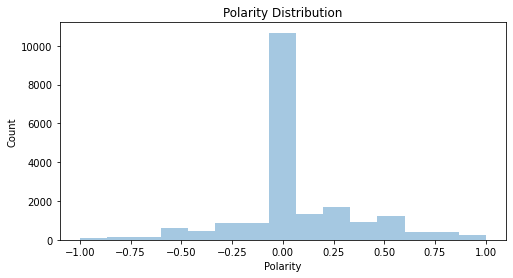

In [20]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.distplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

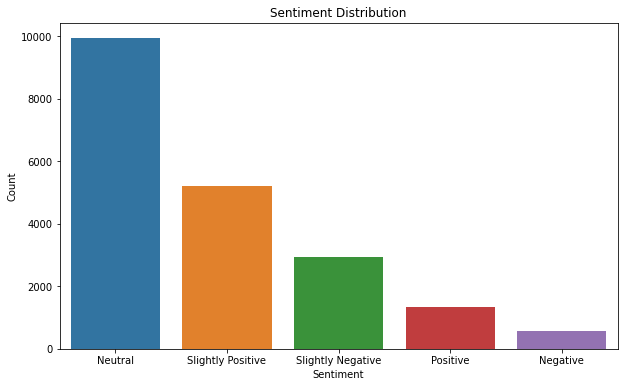

In [21]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

<AxesSubplot:>

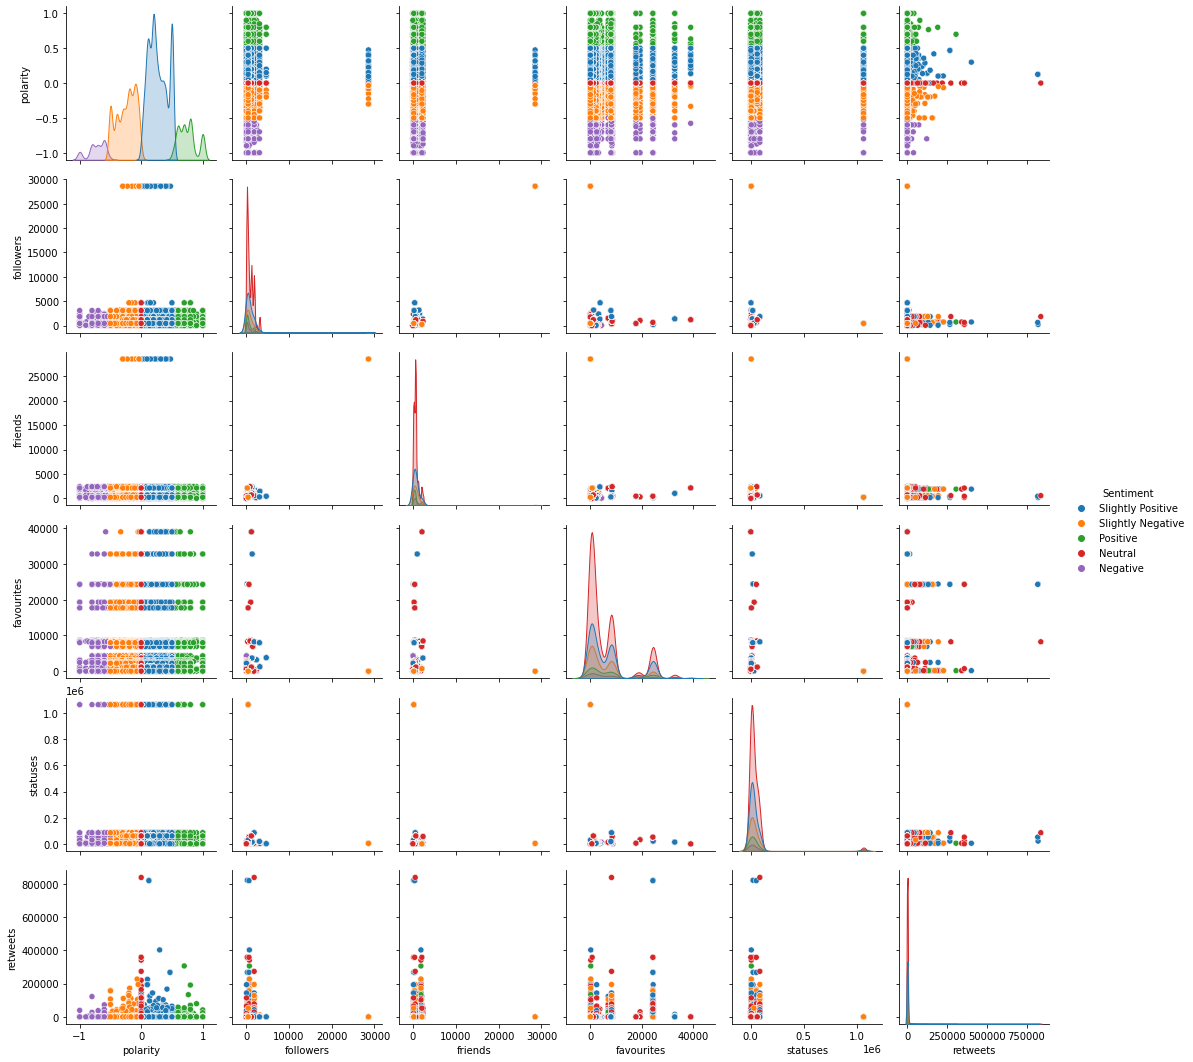

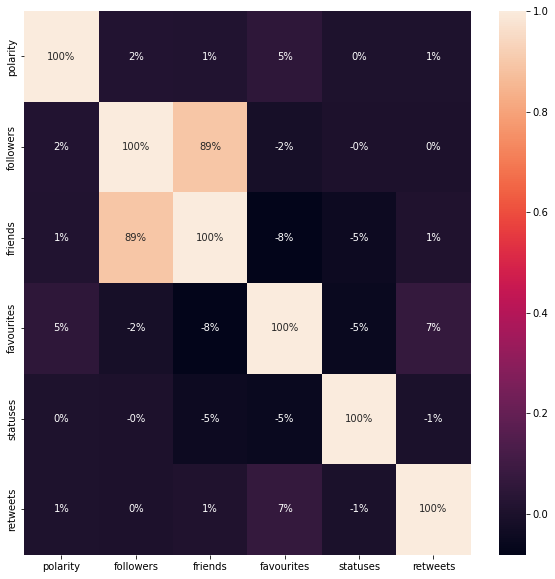

In [22]:
#  plot a pairplot for each pair of variable 
#  plot a pairplot for each pair of variable 
sns.pairplot(df4, hue='Sentiment')

# plot a heatmap to see the correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True, fmt='.0%')


[0.97593665 0.00734286 0.00563411 0.00555441 0.00553198]


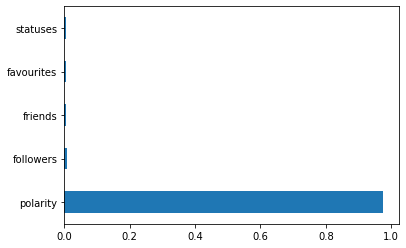

In [23]:
# Find which feature is most important to our classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = df4.iloc[:,0:5]
y = df4.iloc[:,8]


model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Decision Tree, SGD, Logistic Regression

**Decision Tree Classification**

In [24]:
# Import libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
X = df4.iloc[:,0:5] # Features (polarity, followers, friends, favourites, statuses)
y = df4.iloc[:,8] # Target variable (Sentiment)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The accuracy of the Decision Tree is 99.95 %
                   precision    recall  f1-score   support

         Negative       1.00      1.00      1.00       120
          Neutral       1.00      1.00      1.00      1966
         Positive       1.00      1.00      1.00       264
Slightly Negative       1.00      1.00      1.00       598
Slightly Positive       1.00      1.00      1.00      1052

         accuracy                           1.00      4000
        macro avg       1.00      1.00      1.00      4000
     weighted avg       1.00      1.00      1.00      4000



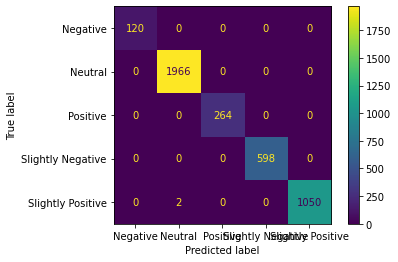

In [26]:
# Create a decision tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Get the accuracy score of the model
print('The accuracy of the Decision Tree is',round(accuracy_score(dtree.predict(X_test), y_test)*100,2),'%')


# Create a classification report
print(classification_report(y_test, dtree.predict(X_test)))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, dtree.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()

The accuracy of the Random Forest Classifier is 99.9 %
                   precision    recall  f1-score   support

         Negative       1.00      0.99      1.00       120
          Neutral       1.00      1.00      1.00      1966
         Positive       1.00      1.00      1.00       264
Slightly Negative       1.00      1.00      1.00       598
Slightly Positive       1.00      1.00      1.00      1052

         accuracy                           1.00      4000
        macro avg       1.00      1.00      1.00      4000
     weighted avg       1.00      1.00      1.00      4000



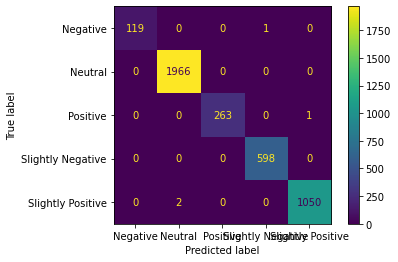

In [27]:
# create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Get the accuracy score of the model
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(rfc.predict(X_test), y_test)*100,2),'%')

# Create a classification report
print(classification_report(y_test, rfc.predict(X_test)))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

The accuracy of the KNN Classifier is 98.05 %
                   precision    recall  f1-score   support

         Negative       0.99      0.83      0.90       120
          Neutral       0.98      1.00      0.99      1966
         Positive       1.00      0.92      0.96       264
Slightly Negative       0.97      0.97      0.97       598
Slightly Positive       0.98      0.98      0.98      1052

         accuracy                           0.98      4000
        macro avg       0.98      0.94      0.96      4000
     weighted avg       0.98      0.98      0.98      4000



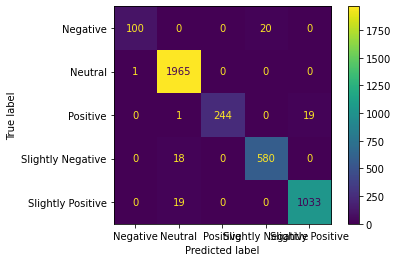

In [28]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()